## 问题1 特征选择 通过熵选择特征

## 加载训练数据

In [1]:
import pandas as pd 
import numpy as np
train_data=pd.read_excel(r"C:\Users\Administrator\Desktop\数学建模\赛题\D\Molecular_Descriptor.xlsx",engine='openpyxl',sheet_name='training')
train_label= pd.read_excel(r"C:\Users\Administrator\Desktop\数学建模\赛题\D\ERα_activity.xlsx",engine='openpyxl',sheet_name='training')
test_data=pd.read_excel(r"C:\Users\Administrator\Desktop\数学建模\赛题\D\Molecular_Descriptor.xlsx",engine='openpyxl',sheet_name='test')
test_label= pd.read_excel(r"C:\Users\Administrator\Desktop\数学建模\赛题\D\ERα_activity.xlsx",engine='openpyxl',sheet_name='test')
train_data
var_num = 40

In [2]:
train_label.iloc[:,0]==train_data.iloc[:,0]

0       True
1       True
2       True
3       True
4       True
        ... 
1969    True
1970    True
1971    True
1972    True
1973    True
Name: SMILES, Length: 1974, dtype: bool

## 数据预处理

In [3]:
train_data[pd.isnull(train_data).T.any()]

,SMILES,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,...,MW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb


In [4]:
class_col_1 = []
class_col = []
# class_col_2 = []
for col in range(train_data.shape[1]):
    num=0
    vals = set()
    for row in range(train_data.shape[0]):
        vals.add(train_data.iloc[row,col])
        if len(vals)>2:break
    if len(vals)==1:class_col_1.append(col)
    else: class_col.append(col)
#     else 
class_col_1

[11,
 52,
 126,
 127,
 128,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 153,
 159,
 161,
 166,
 170,
 177,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 188,
 189,
 196,
 197,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 217,
 218,
 219,
 220,
 222,
 223,
 224,
 225,
 245,
 246,
 247,
 257,
 258,
 259,
 260,
 261,
 262,
 263,
 264,
 272,
 278,
 280,
 285,
 289,
 296,
 299,
 300,
 301,
 302,
 303,
 304,
 305,
 307,
 308,
 315,
 316,
 318,
 319,
 320,
 321,
 322,
 323,
 324,
 325,
 326,
 327,
 328,
 329,
 330,
 331,
 332,
 333,
 334,
 336,
 337,
 338,
 339,
 341,
 342,
 343,
 344,
 364,
 365,
 366,
 376,
 377,
 378,
 379,
 380,
 381,
 382,
 383,
 391,
 397,
 399,
 404,
 408,
 415,
 418,
 419,
 420,
 421,
 422,
 423,
 424,
 426,
 427,
 434,
 435,
 437,
 438,
 439,
 440,
 441,
 442,
 443,
 444,
 445,
 446,
 447,
 448,
 449,
 450,
 451,
 452,
 453,
 455,
 456,
 457,
 458,
 460,
 461,
 462,
 463,
 483,
 484,
 485,
 495,
 496,
 497,


In [5]:
len(class_col_1)
train_data = train_data.iloc[:,class_col]
train_data.shape

(1974, 505)

## 线性拟合并计算相关度

In [6]:
from sklearn import linear_model
#导入模型，模型参数默认
LR = linear_model.LinearRegression()
#训练模型
LR.fit(train_data.iloc[:,1:],train_label.iloc[:,2])
#预测模型LR.predict(X_test),此时输出类别数据
#打印截距
print('intercept_:' ,LR.intercept_)
#打印模型系数
print('coef_:', LR.coef_)

intercept_: 58165.904055644
coef_: [-1.58149044e-02  6.84560222e-02 -8.85922710e-03  2.14481470e-02
  1.65336834e+02 -1.49234451e+01  1.91981117e+01  2.12104902e+00
  5.73019164e+01 -5.51834377e+01 -2.92792314e+01  3.69012199e+01
  2.71025125e+01 -1.58081515e+02  1.99618267e+02  2.84249033e+01
 -1.61545290e+01 -4.85363202e+01  1.73049694e+01 -1.89617247e+01
  4.95701340e+00  8.62677511e-01  4.15422864e+00  2.73898064e+00
  7.49408103e-01 -1.61953028e+01 -2.84372197e+00  5.67653904e-02
  4.57866029e-02  7.86633580e-02 -2.00367110e-02  1.57187181e-02
 -5.55826604e-03  4.24329316e-03 -1.79974978e-03 -1.82687837e-01
 -1.02536513e+00  2.63124536e-02 -3.67111538e+00 -2.11815122e+00
  1.74301905e-01  1.87104973e-01  7.22238457e+01  1.70405881e+01
 -1.45772304e+01 -6.33301664e+00  4.88504679e+01  1.60742119e+01
 -1.13689674e+01  1.55432783e+01  2.33733370e+01  7.88337453e-01
  7.66190570e+00  2.15576492e+01  1.97651474e-01  6.81918687e-01
  1.32297981e+00  7.72221757e-01  1.36067995e+00  1.550

In [7]:
LRcoef = train_data.columns[abs(LR.coef_).argsort()[:var_num]]
LRcoef

Index(['SHBint5', 'WPATH', 'WTPT-5', 'maxHBint9', 'FMF', 'ATSp4', 'CrippenMR',
       'Kier3', 'SHBint9', 'ATSp3', 'maxaaN', 'SHBint4', 'ATSp2', 'MDEC-14',
       'SHBint6', 'ALogP', 'SHBint3', 'maxHBint6', 'minwHBd', 'nHBint9',
       'ATSp1', 'SMILES', 'SHBint2', 'ATSm5', 'nRotB', 'ALogp2', 'maxHBint7',
       'MDEC-24', 'nAtomLC', 'minHBint9', 'maxHBa', 'maxwHBa', 'BCUTw-1l',
       'MDEC-22', 'minHBint2', 'SHBint7', 'maxwHBd', 'minHBint5', 'maxHBint8',
       'mindCH2'],
      dtype='object')

## 分析皮尔逊 斯皮尔曼 kendall相关系数 显著性检验P值

In [8]:
from scipy.stats import pearsonr,spearmanr,kendalltau
pearson_res,kendall_res,spearman_res = [],[],[]
pearsonr_p,kendalltau_p,spearmanr_p = [],[],[]
corr_type = ['pearson', 'kendall', 'spearman']
for i in range(1,train_data.shape[1]):
    df = pd.concat([train_data.iloc[:,i],train_label.iloc[:,2]],axis = 1)
    pearson = df.corr(corr_type[0]).iloc[0,1]
    pearson_res.append(pearson)
    
    kendall = df.corr(corr_type[1]).iloc[0,1]
    kendall_res.append(kendall)
    
    spearman = df.corr(corr_type[2]).iloc[0,1]
    spearman_res.append(spearman_res)
    
    pearsonr_p.append( pearsonr(df.iloc[:,0],df.iloc[:,1]))
    spearmanr_p.append( spearmanr(df.iloc[:,0],df.iloc[:,1]))
    kendalltau_p.append( kendalltau(df.iloc[:,0],df.iloc[:,1]))
pearson_res

[0.06492516067133493,
 0.1880088186062779,
 0.03304806626943127,
 0.42514903357402944,
 0.38325310794467,
 0.3254686200883912,
 0.2859809670006345,
 0.3619886024837766,
 0.35070976326062436,
 0.34490203993099494,
 0.4595489555376118,
 -0.1862209767901111,
 0.07198352325293873,
 0.006508456085423436,
 -0.035941021523001965,
 0.0870620930929626,
 -0.06113107541088629,
 -0.09251546074442356,
 -0.044223204229198024,
 0.020659134538402856,
 -0.02812663681646639,
 0.06085876146961617,
 -0.3518593515659508,
 0.3185279458099652,
 -0.07551546990147502,
 0.08786621189360251,
 0.2988073450609497,
 0.28646095530036964,
 0.2981131703126566,
 0.2506057190952875,
 0.3965157318282229,
 0.3991267990626582,
 0.3866528782887665,
 0.40072083671940967,
 0.38362800596294666,
 0.1788143166078942,
 -0.1638326014337364,
 -0.05601932545138115,
 -0.31925695663598874,
 -0.281782837975601,
 -0.13885030151482783,
 0.42852553038987823,
 0.3720522357648788,
 0.37405809924021716,
 0.362136580170164,
 0.317802891866940

In [9]:
np.array(pearsonr_p)[np.array(pearsonr_p)[:,1].argsort()]

array([[ 5.38047798e-001,  1.47234607e-148],
       [ 5.29321142e-001,  5.65463800e-143],
       [ 4.91854942e-001,  9.12453931e-121],
       ...,
       [-1.43815570e-003,  9.49084558e-001],
       [ 1.01136030e-003,  9.64182231e-001],
       [ 7.13185343e-004,  9.74737964e-001]])

## 计算皮尔逊 斯皮尔曼 kendall相关系数的前50相关性最大元素

In [10]:
pearsonr_corr = train_data.columns[[np.array(pearsonr_p)[:,1].argsort()[:var_num]]]
pearsonr_corr

d:\anaconda\envs\pytorch_gpu_1_6\lib\site-packages\pandas\core\indexes\base.py:4114: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


Index(['MDEC-22', 'nAtomLAC', 'gmin', 'maxssssNp', 'minssssNp', 'nH',
       'nT5Ring', 'n5Ring', 'minaaN', 'BCUTp-1l', 'C1SP2', 'gmax', 'ALogp2',
       'SHBa', 'maxaaN', 'MDEC-14', 'SP-4', 'SdsCH', 'VP-7', 'maxHBint10',
       'C2SP1', 'nHdsCH', 'ndsCH', 'ATSp3', 'minHBint10', 'ATSp1', 'ATSm5',
       'SP-5', 'nHAvin', 'VABC', 'VP-2', 'ATSp2', 'SP-6', 'ATSp4', 'AMR',
       'VP-3', 'VP-0', 'VP-4', 'VP-1', 'nBonds'],
      dtype='object')

In [11]:
spearmanr_corr =train_data.columns[[np.array(spearmanr_p)[:,1].argsort()[:var_num]]]
spearmanr_corr

Index(['MDEC-22', 'nAtomLAC', 'gmin', 'C2SP1', 'nH', 'VP-7', 'maxssssNp',
       'ALogp2', 'ATSp4', 'SHBa', 'ATSp3', 'ATSp1', 'ATSm5', 'C1SP2', 'SP-4',
       'AMR', 'minaaN', 'nT5Ring', 'FMF', 'SdsCH', 'nBonds', 'VP-4',
       'BCUTp-1l', 'nAromBond', 'ATSp2', 'maxaaN', 'n5Ring', 'gmax', 'VP-0',
       'nBonds2', 'minssssNp', 'VP-1', 'nHdsCH', 'ndsCH', 'MLogP', 'SP-5',
       'VP-3', 'TopoPSA', 'VP-2', 'MDEC-14'],
      dtype='object')

In [12]:
kendalltau_corr =train_data.columns[[np.array(kendalltau_p)[:,1].argsort()[:var_num]]]
kendalltau_corr

Index(['MDEC-22', 'nAtomLAC', 'gmin', 'C2SP1', 'nH', 'VP-7', 'maxssssNp',
       'ATSp4', 'ATSp3', 'SP-4', 'nT5Ring', 'ATSp1', 'ALogp2', 'ATSm5',
       'C1SP2', 'VP-4', 'SHBa', 'n5Ring', 'minssssNp', 'ATSp2', 'BCUTp-1l',
       'AMR', 'gmax', 'minaaN', 'SdsCH', 'SP-5', 'FMF', 'VP-3', 'nBonds',
       'VP-1', 'VP-2', 'nAromBond', 'SP-6', 'maxaaN', 'VP-5', 'nBonds2',
       'ndsCH', 'nHdsCH', 'VP-0', 'WPATH'],
      dtype='object')

In [13]:
col_num = {}
corrs=[LRcoef,pearsonr_corr,spearmanr_corr,kendalltau_corr]
for i in range(var_num):
    for corr in corrs:
        if col_num.get(corr[i]) is None:
            col_num[corr[i]] = 0
        col_num[corr[i]] = col_num[corr[i]]+1

In [14]:
sort_col  =sorted(col_num, key=lambda k: col_num[k], reverse=True)
for i in range(20):
    print(sort_col[i],col_num[sort_col[i]])

MDEC-22 4
ATSp4 4
ALogp2 4
ATSp3 4
maxaaN 4
ATSp1 4
ATSp2 4
ATSm5 4
nAtomLAC 3
gmin 3
maxssssNp 3
C2SP1 3
FMF 3
minssssNp 3
nH 3
VP-7 3
nT5Ring 3
n5Ring 3
minaaN 3
BCUTp-1l 3


## 绘制相关性散点图

<AxesSubplot:xlabel='ALogP', ylabel='pIC50'>

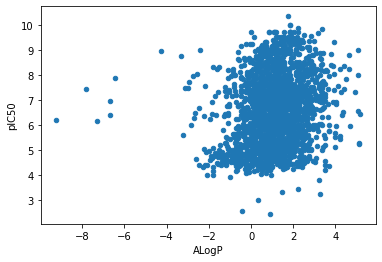

In [18]:
temp =pd.concat([train_data.iloc[:1561,2],train_data.iloc[1563:,2]]) #train_data["ATSp3"]
# temp = (temp-temp.mean())/temp.std()
df = pd.concat([temp,train_label.iloc[:,2]],axis = 1)
df.plot.scatter(x=df.columns[0], y=train_label.columns[-1])

## 第2问进行建模

In [16]:
pd.concat([train_data.iloc[:1561,2],train_data.iloc[1563:,2]])

0      -0.2860
1      -0.8620
2       0.7296
3      -0.3184
4       1.3551
         ...  
1969    1.8193
1970    1.6903
1971    1.6903
1972    1.3365
1973    1.8193
Name: ALogP, Length: 1972, dtype: float64

In [19]:
train_data.columns[8]


'nAtom'